# **Business Problem**[<a href="https://www.kaggle.com/carrie1/ecommerce-data">src</a>]

## **Description**
As a manager of the online store, you would want to group the customers into different clusters, so that you can make a customised marketing campaign for each of the group. You would have to decide what the important business criteria are on which you would want to segregate the customers.
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## **Task**

- Decide the important business criteria to segregate he customers
- Group customers into clusters to run targeted campaigns

## **Steps Involved :**

1. Overview and understanding of data
2. Data preprocessing
3. Data preparation for modeling
4. Cluster assignment using K-means clustering
5. Recommendations

**Refrences**
- [5 Clustering algorithms data scientists need to know](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)
- [RFM Analysis](https://clevertap.com/blog/rfm-analysis/)

# **1. Overview and understanding of data**

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# K-means clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# hierarchical Clustering libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)

warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
# Importing data.csv
df = pd.read_csv('../input/ecommerce-data/data.csv', sep=",", encoding="ISO-8859-1", header=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
# basics of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

# **2. Data preprocessing**

## **Dropping records with missing Customer ID**

As customer segmentation would not be possible without Customer ID, so records with missing customer ID have been dropped.

In [6]:
df.dropna(inplace=True)

In [7]:
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [8]:
df.shape

(406829, 8)

## **Formatting 'CustomerID' and 'InvoiveDate'**

In [9]:
df['CustomerID'] = df['CustomerID'].astype('int')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format=True)

## **Generating 'Amount' column using 'Quantity' & 'UnitPrice'**

In [10]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# **3. Data preparation for modeling**

### What is clustering ?
Clustering is the process of grouping observations of similar kinds into smaller groups within the larger population. It has widespread application in business analytics. One of the questions facing businesses is how to organize the huge amounts of available data into meaningful structures.Or break a large heterogeneous population into smaller homogeneous groups. Cluster analysis is an exploratory data analysis tool which aims at sorting different objects into groups in a way that the degree of association between two objects is maximal if they belong to the same group and minimal otherwise.

### When to use clustering?

- *Clustering is primarily used to perform segmentation, be it customer, product or store. We have already talked about customer segmentation using cluster analysis in the example above. Similarly products can be clustered together into hierarchical groups based on their attributes like use, size, brand, flavor etc; stores with similar characteristics – similar sales, size, customer base etc, can be clustered together.*

- Clustering can also be used for anomaly detection, for example, identifying fraud transactions. Cluster detection methods can be used on a sample containing only good transactions to determine the shape and size of the “normal” cluster. When a transaction comes along that falls outside the cluster for any reason, it is suspect. This approach has been used in medicine to detect the presence of abnormal cells in tissue samples and in telecommunications to detect calling patterns indicative of fraud.

- Clustering is often used to break large set of data into smaller groups that are more amenable to other techniques. For example, logistic regression results can be improved by performing it separately on smaller clusters that behave differently and may follow slightly different distributions.

For our business problem, we have to segment customers based on their behavoiural attrubutes. One of the most popular, easy-to-use, and effective segmentation methods to enable marketers to analyze customer behavior is RFM analysis.

### What is RFM Analysis?
The  idea is to segment customers based on when their last purchase was, how often they’ve purchased in the past, and how much they’ve spent overall. All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers.

<img src="https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png">

Before we start with data modelling, we have to group transaction at customer level and calculate their R-F-M metrics.

## **Calculating RFM metrics**

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


**Monetary -** Total or average amount spent by the customer.


In [12]:
# Calculating Monetary attribute
cus_data = df.groupby('CustomerID')[['Amount']].sum() # Total amount spent
cus_data.rename(columns={'Amount':'Monetary'},inplace=True)
cus_data.head()

,Monetary
CustomerID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


**Frequency -** Total number of transactions made by customer or average time between transactions.

In [13]:
# Calculating frequency attribute
cus_data['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].count()
cus_data.head()

,Monetary,Frequency
CustomerID,,
12346,0.00,2
12347,4310.00,182
12348,1797.24,31
12349,1757.55,73
12350,334.40,17


**Recency -** Time since last order or engaged with product.

In [14]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
df['diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00


In [16]:
import datetime as dt

cus_data['Recency'] = df.groupby('CustomerID')['diff'].min().dt.days
cus_data = cus_data.reset_index()
cus_data.head()

,CustomerID,Monetary,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


## **Treating Outliers**

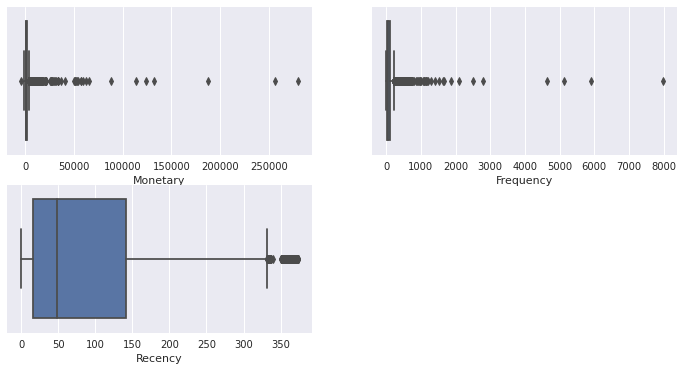

In [17]:
num_features = cus_data.columns[1:]
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(12,6))

for n,i in enumerate(num_features):
    sns.boxplot(x=i, data=cus_data,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

Based on the above box plots, it's visible that Monetary and Frequency attributes have outliers. Since clustering algorithms like K-means are susceptible to outliers we will be treating them by capping them at 95% quantile.

In [18]:
h_cap = 0.95
h_cap_val = cus_data['Monetary'].quantile(h_cap)
cus_data['Monetary'][cus_data['Monetary'] > h_cap_val] = h_cap_val
l_cap = 0.05
l_cap_val = cus_data['Monetary'].quantile(l_cap)
cus_data['Monetary'][cus_data['Monetary'] < l_cap_val] = l_cap_val

In [19]:
cap = 0.95
cap_val = cus_data['Frequency'].quantile(cap)
cus_data['Frequency'][cus_data['Frequency'] > cap_val] = cap_val

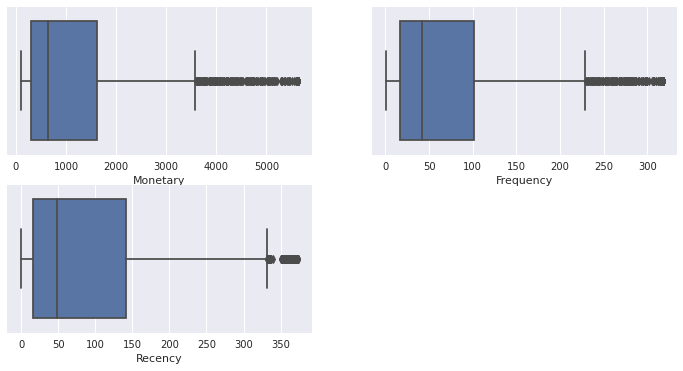

In [20]:
num_features = cus_data.columns[1:]
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(12,6))

for n,i in enumerate(num_features):
    sns.boxplot(x=i, data=cus_data,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

## **Creating pipeline for feature scaling & dimensionality reduction**

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

In [22]:
X = cus_data.drop('CustomerID',axis=1)
X_scaled = pd.DataFrame(preprocessor.fit_transform(X),columns=['PC_1','PC_2'])

## **Hopkins Test**

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [23]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
for i in range(5):
  print('Hopkins statistic value is:',round(hopkins(X_scaled),3))

Hopkins statistic value is: 0.962
Hopkins statistic value is: 0.959
Hopkins statistic value is: 0.957
Hopkins statistic value is: 0.954
Hopkins statistic value is: 0.959


Since the Hopkins test value hovers around 0.95, therefore given data have high clustering tendency.

# **4. Cluster assignment using K-means clustering**

## **a) Finding Optimal value of K (Clusters)**

- Elbow Method
- Silhouette Analysis

### **Elbow method**

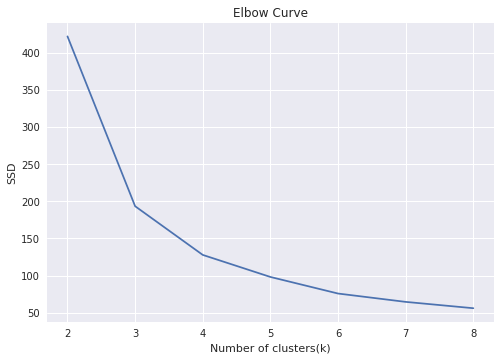

In [25]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)
plt.xlabel('Number of clusters(k)')
plt.ylabel('SSD')
plt.title('Elbow Curve')
plt.show()

Based on above "elbow" curve, k=3 seems to be the optimal number of clusters.

### **Silhouette Analysis**

In [26]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, round(silhouette_avg,2)))

For n_clusters=2, the silhouette score is 0.54
For n_clusters=3, the silhouette score is 0.55
For n_clusters=4, the silhouette score is 0.52
For n_clusters=5, the silhouette score is 0.48
For n_clusters=6, the silhouette score is 0.46
For n_clusters=7, the silhouette score is 0.44
For n_clusters=8, the silhouette score is 0.41


Using silhouette analysis k=3 seems to be the optimal number of clusters.

## **b) Run K-means using optimal K**

In [27]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=1)
kmeans.fit(X_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=1)

In [28]:
# Adding cluster labels to master dataframe
X_scaled['cluster_id'] = kmeans.labels_
X['cluster_id'] = kmeans.labels_

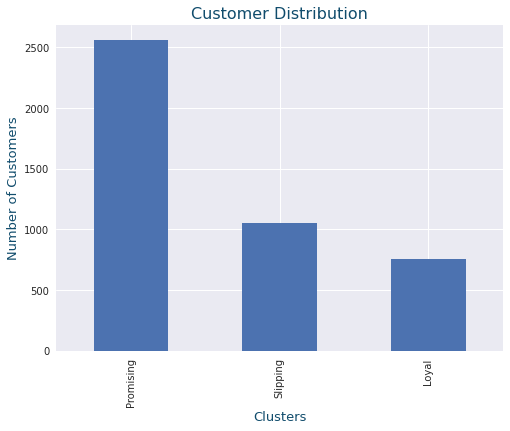

In [29]:
# Number of customers per cluster

font_title = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 16,
        }


font_label = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 13,
        }
plt.figure(figsize=(8,6))
ax = X_scaled['cluster_id'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Promising','Slipping','Loyal'])
ax.set_ylabel('Number of Customers',font_label)
ax.set_xlabel('Clusters',font_label)
ax.set_title("Customer Distribution",font_title)
plt.show()

## **c) Clustering profiling using R-F-M**

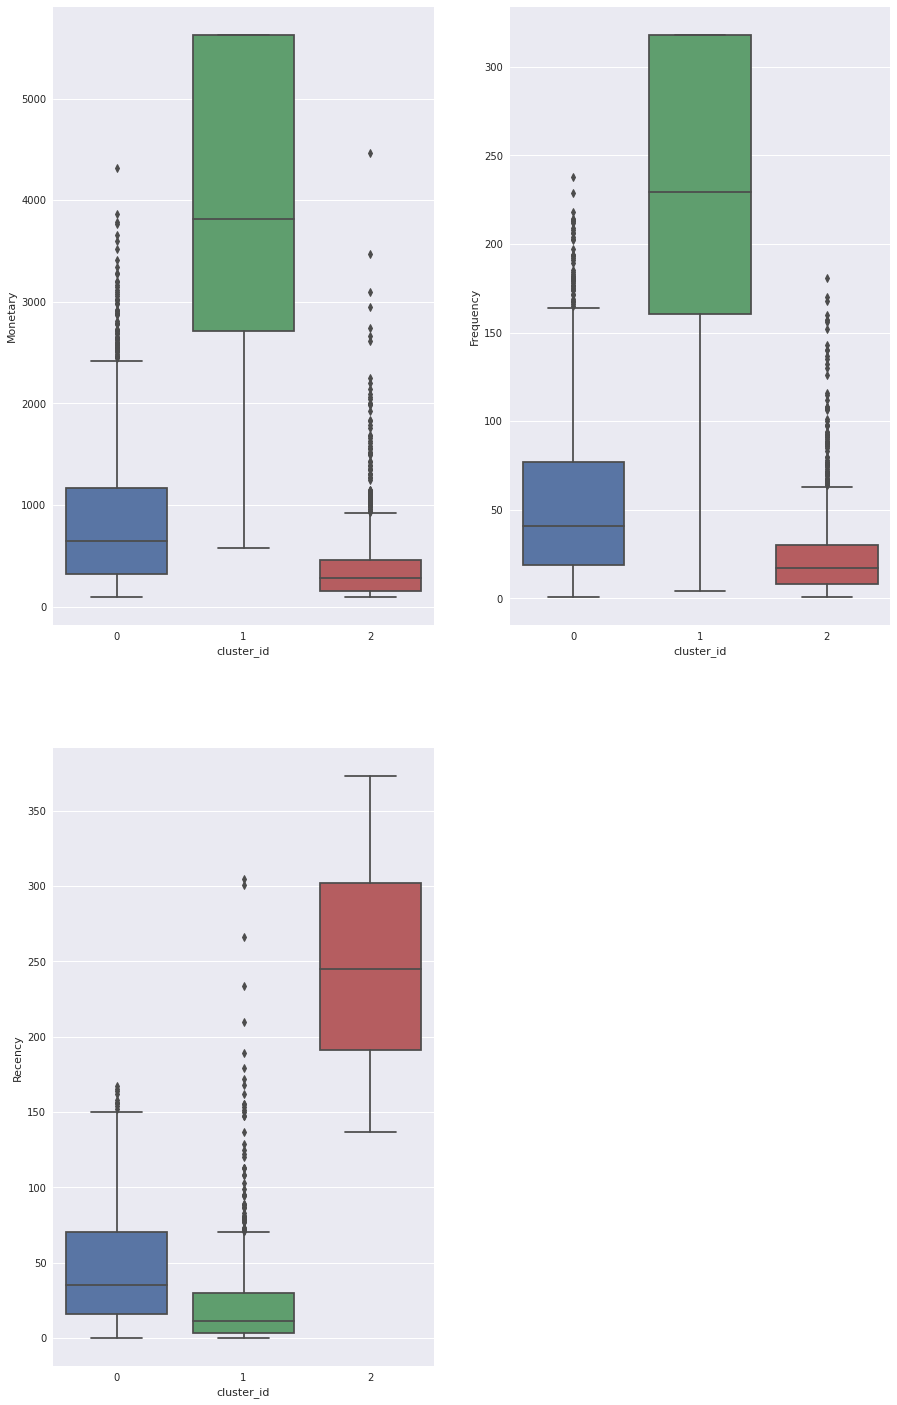

In [30]:
# Visualizing Numerical columns using Boxplots
cols = X.columns[0:-1].tolist()
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(15,25))

for n,i in enumerate(cols):
    sns.boxplot(x='cluster_id',y=cols[n], data=X,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

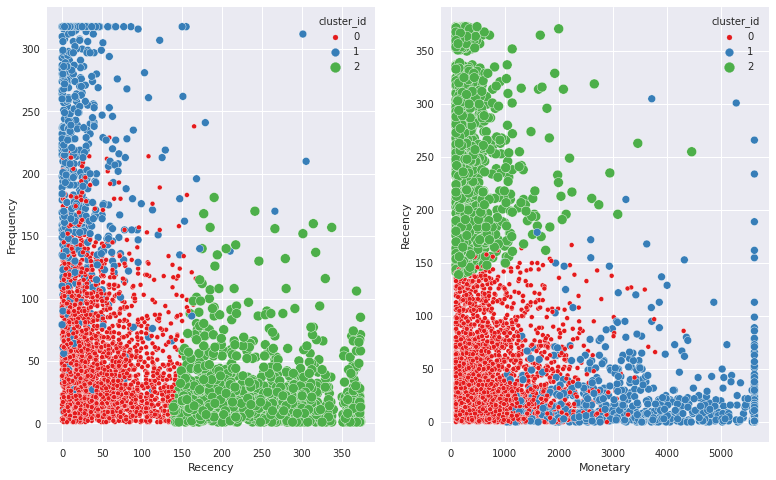

In [31]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
sns.scatterplot(data=X,x="Recency",y="Frequency",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,2)
'''sns.scatterplot(data=X,x="Frequency",y="Monetary",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,3)'''
sns.scatterplot(data=X,x="Monetary",y="Recency",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

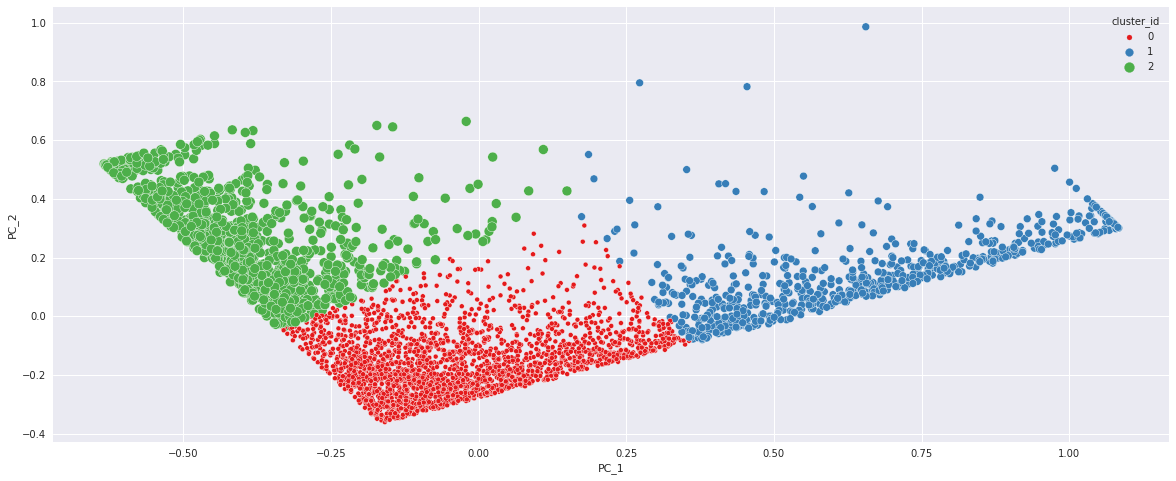

In [32]:
# Vusializing clusters using Principle Components
fig = plt.figure(figsize=[20,8])

sns.scatterplot(data=X_scaled,x="PC_1",y="PC_2",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

**Inference:**
1. ***Cluster 0*** contains the customers who generate the least revenue and are not frequent, most likely because these were one-time customers. Hence they can be labeled as ***Slipping***. 
2. ***Cluster 1*** seems to have the most ***loyal*** customers, as they bring the most revenue and are often the most frequent customers. 
3. ***Cluster 2*** customers seem ***promising*** as it consists of frequent buyers, however revenue generation is not as high as Loyal customers. 

<H2>Cluster Labels:</h2>
<H3>
Cluster 0 - Slipping<br>
Cluster 1 - Loyal<br>
Cluster 2 - Promising<br>
</H3>

# **5. Recommendations**

After segmenting customers into loyal, slipping, and promising it empowers businesses to run personalized, high-performing campaigns and preserves profit margin. Below are a few recommendations or targeted strategies for each customer segment:

- **Loyal** - Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with Free Shipping or other like benefits.

- **Promising** - Focus on increasing monetization through product recommendations based on past purchases and incentives tied to spending thresholds.

- **Slipping** - Customers leave for a variety of reasons. Depending on your situation price deals, new product launches, or other retention strategies.